In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# Define a simple 2-layer fully connected neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.fc3 = nn.Linear(hidden_size_2, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Example usage
input_size = 1  # Adjust based on your data
hidden_size_1 = 16
hidden_size_2 = 16
output_size = 1

model = SimpleNN(input_size, hidden_size_1, hidden_size_2, output_size)
print(model)

SimpleNN(
  (fc1): Linear(in_features=1, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [3]:
# Generate dataset
num_points = 10000
x = np.random.uniform(0, 2 * np.pi, num_points)  # Randomly distributed inputs between 0 and 2π
epsilon = np.random.normal(0, 0.1, num_points)  # Normally distributed noise with variance 0.1
y = np.sin(x) + epsilon  # Outputs with noise added

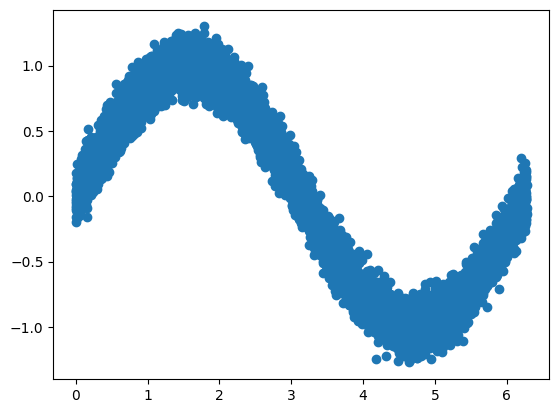

In [4]:
plt.scatter(x, y)

In [5]:
# Split the data into training and testing sets
indices = np.random.permutation(num_points)
train_size = int(0.8 * num_points)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

x_train = x[train_indices]
y_train = y[train_indices]

x_test = x[test_indices]
y_test = y[test_indices]

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0593
Epoch [200/1000], Loss: 0.0420
Epoch [300/1000], Loss: 0.0157
Epoch [400/1000], Loss: 0.0109
Epoch [500/1000], Loss: 0.0103
Epoch [600/1000], Loss: 0.0101
Epoch [700/1000], Loss: 0.0102
Epoch [800/1000], Loss: 0.0101
Epoch [900/1000], Loss: 0.0102
Epoch [1000/1000], Loss: 0.0100


In [6]:
model.eval()  # Set the model to evaluation mode

SimpleNN(
  (fc1): Linear(in_features=1, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [7]:
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)

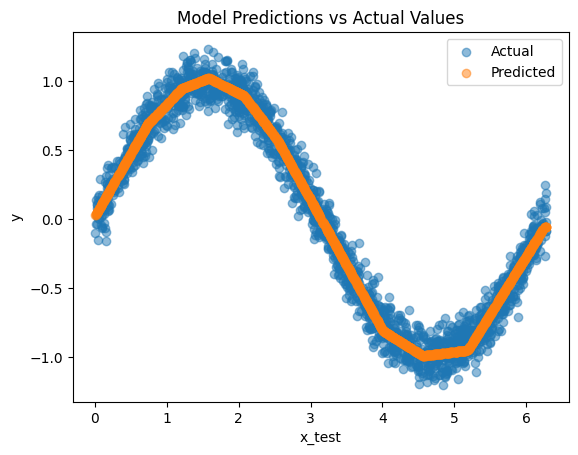

In [8]:
# Get predictions
with torch.no_grad():  # Disable gradient computation for evaluation
    predictions = model(x_test_tensor)

# Plot predictions vs actual values
plt.scatter(x_test, y_test, label='Actual', alpha=0.5)
plt.scatter(x_test, predictions.numpy(), label='Predicted', alpha=0.5)
plt.legend()
plt.xlabel('x_test')
plt.ylabel('y')
plt.title('Model Predictions vs Actual Values')
plt.show()